IMPORT KNIHOVEN

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import seaborn as sns

IMPORT DATASETU

In [4]:
rfm_tab = pd.read_csv('rfm_tab_2.csv.gz',sep=",", compression='gzip', encoding='utf-8')
print(rfm_tab)

        ID_CLIENT     RECENCY  FREQUENCY  MONETARY_VALUE
0           72327  2019-05-25          2            2000
1           72361  2019-10-29       7798         7835759
2           72371  2017-06-27         15           19500
3           72455  2018-11-25          2            2000
4           72462  2019-10-25        905         1900827
...           ...         ...        ...             ...
272981     657385  2019-10-29          1            5000
272982     657485  2019-10-29          1            1000
272983     657546  2019-10-29          2            2000
272984     657577  2019-10-29          2            2000
272985     657949  2019-10-29          1            1000

[272986 rows x 4 columns]


In [5]:
print(rfm_tab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272986 entries, 0 to 272985
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_CLIENT       272986 non-null  int64 
 1   RECENCY         272986 non-null  object
 2   FREQUENCY       272986 non-null  int64 
 3   MONETARY_VALUE  272986 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 8.3+ MB
None


ZMĚNA DATOVÉHO TYPU - RECENCY

In [6]:
for column in rfm_tab.columns:
    if rfm_tab['RECENCY'].dtype == 'object':
        rfm_tab['RECENCY'] = rfm_tab['RECENCY'].astype(np.datetime64)

In [7]:
print(rfm_tab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272986 entries, 0 to 272985
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_CLIENT       272986 non-null  int64         
 1   RECENCY         272986 non-null  datetime64[ns]
 2   FREQUENCY       272986 non-null  int64         
 3   MONETARY_VALUE  272986 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.3 MB
None


SCRIPT PRO ODPOČET DNŮ RECENCY - OD CURRENT DATE

In [8]:
def get_diff(): 
    dif=[]
    for date in rfm_tab['RECENCY']:
        date_format = '%Y-%m-%d'
        current_date = date.to_pydatetime()  
        today = datetime.today()
        diff = today - current_date
        dif.append(diff.days) 
    return dif
rfm_tab['RECENCY_DAYS'] = get_diff()

print(rfm_tab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272986 entries, 0 to 272985
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_CLIENT       272986 non-null  int64         
 1   RECENCY         272986 non-null  datetime64[ns]
 2   FREQUENCY       272986 non-null  int64         
 3   MONETARY_VALUE  272986 non-null  int64         
 4   RECENCY_DAYS    272986 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 10.4 MB
None


In [9]:
rfm_tab[["FREQUENCY", "MONETARY_VALUE", "RECENCY_DAYS"]].describe()

,FREQUENCY,MONETARY_VALUE,RECENCY_DAYS
count,272986.000000,2.729860e+05,272986.000000
mean,478.527272,4.670945e+05,663.288290
std,3826.201875,6.353549e+06,275.286489
min,1.000000,-1.519212e+09,394.000000
25%,3.000000,1.000000e+03,409.000000
50%,22.000000,1.560000e+04,576.000000
75%,124.000000,1.034445e+05,896.000000
max,200615.000000,9.199628e+08,1426.000000


In [10]:
print(rfm_tab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272986 entries, 0 to 272985
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_CLIENT       272986 non-null  int64         
 1   RECENCY         272986 non-null  datetime64[ns]
 2   FREQUENCY       272986 non-null  int64         
 3   MONETARY_VALUE  272986 non-null  int64         
 4   RECENCY_DAYS    272986 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 10.4 MB
None


VÝPOČET IQR

OUTLIERS HANDLING - FREQUENCY (OUTLIERS HODNOTY JAKO UPPER LIMIT NEBO LOWER LIMIT) + VIZUALIZACE

In [11]:
Q1_F = rfm_tab['FREQUENCY'].quantile(0.25)
Q3_F = rfm_tab['FREQUENCY'].quantile(0.75)
IQR_F = Q3_F - Q1_F
print(Q1_F, Q3_F, IQR_F)

upper_limit_F = Q3_F + (1.5*IQR_F)
print(upper_limit_F)

lower_limit_F = Q1_F - (1.5*IQR_F)
print(lower_limit_F)

3.0 124.0 121.0
305.5
-178.5


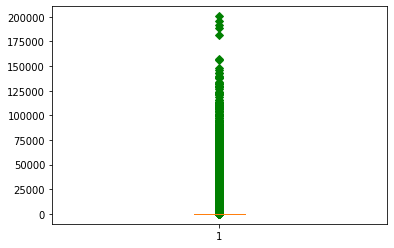

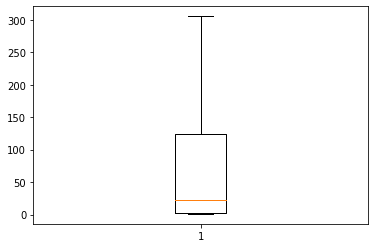

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(rfm_tab['FREQUENCY'], 0, 'gD')
plt.show()

rfm_tab['FREQUENCY'] = np.where(rfm_tab['FREQUENCY'] <lower_limit_F, lower_limit_F,rfm_tab['FREQUENCY'])
rfm_tab['FREQUENCY'] = np.where(rfm_tab['FREQUENCY'] >upper_limit_F, upper_limit_F,rfm_tab['FREQUENCY'])
plt.figure()
plt.boxplot(rfm_tab['FREQUENCY'], 0, 'gD')
plt.show()

In [13]:
rfm_tab['FREQUENCY'].describe()

count    272986.000000
mean         82.340444
std         110.284894
min           1.000000
25%           3.000000
50%          22.000000
75%         124.000000
max         305.500000
Name: FREQUENCY, dtype: float64

OUTLIERS HANDLING - MONETARY_VALUE (OUTLIERS HODNOTY JAKO UPPER LIMIT NEBO LOWER LIMIT) + VIZUALIZACE

In [14]:
Q1_M = rfm_tab['MONETARY_VALUE'].quantile(0.25)
Q3_M = rfm_tab['MONETARY_VALUE'].quantile(0.75)
IQR_M = Q3_M - Q1_M
print(Q1_M, Q3_M, IQR_M)

upper_limit_M = Q3_M + (1.5*IQR_M)
print(upper_limit_M)

lower_limit_M = Q1_M - (1.5*IQR_M)
print(lower_limit_M)

1000.0 103444.5 102444.5
257111.25
-152666.75


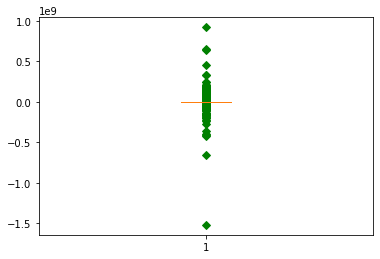

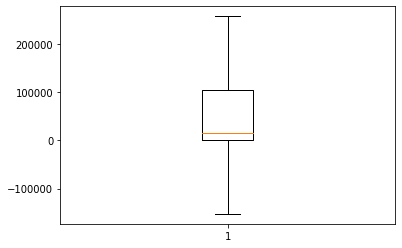

In [15]:
plt.figure()
plt.boxplot(rfm_tab['MONETARY_VALUE'], 0, 'gD')
plt.show()

rfm_tab['MONETARY_VALUE'] = np.where(rfm_tab['MONETARY_VALUE'] <lower_limit_M, lower_limit_M,rfm_tab['MONETARY_VALUE'])
rfm_tab['MONETARY_VALUE'] = np.where(rfm_tab['MONETARY_VALUE'] >upper_limit_M, upper_limit_M,rfm_tab['MONETARY_VALUE'])
plt.figure()
plt.boxplot(rfm_tab['MONETARY_VALUE'], 0, 'gD')
plt.show()

OUTLIERS HANDLING - RECENCY_DAYS (OUTLIERS HODNOTY JAKO UPPER LIMIT NEBO LOWER LIMIT) + VIZUALIZACE

In [16]:
Q1_R = rfm_tab['RECENCY_DAYS'].quantile(0.25)
Q3_R = rfm_tab['RECENCY_DAYS'].quantile(0.75)
IQR_R = Q3_R - Q1_R
print(Q1_R, Q3_R, IQR_R)

upper_limit_R = Q3_R + (1.5*IQR_R)
print(upper_limit_R)

lower_limit_R = Q1_R - (1.5*IQR_R)
print(lower_limit_R)

409.0 896.0 487.0
1626.5
-321.5


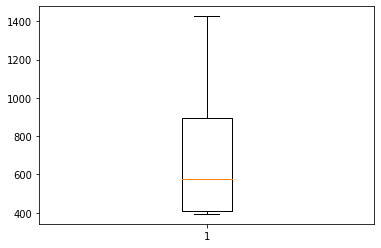

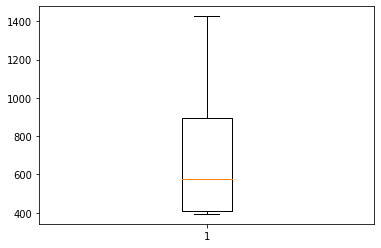

In [17]:
plt.figure()
plt.boxplot(rfm_tab['RECENCY_DAYS'], 0, 'gD')
plt.show() 

rfm_tab['RECENCY_DAYS'] = np.where(rfm_tab['RECENCY_DAYS'] <lower_limit_R, lower_limit_R,rfm_tab['RECENCY_DAYS'])
rfm_tab['RECENCY_DAYS'] = np.where(rfm_tab['RECENCY_DAYS'] >upper_limit_R, upper_limit_R,rfm_tab['RECENCY_DAYS'])
plt.figure()
plt.boxplot(rfm_tab['RECENCY_DAYS'], 0, 'gD')
plt.show() 

In [18]:
rfm_tab.describe()

,ID_CLIENT,FREQUENCY,MONETARY_VALUE,RECENCY_DAYS
count,272986.000000,272986.000000,272986.000000,272986.000000
mean,353123.422487,82.340444,61879.546629,663.288290
std,160382.045154,110.284894,103052.063345,275.286489
min,72320.000000,1.000000,-152666.750000,394.000000
25%,220111.750000,3.000000,1000.000000,409.000000
50%,344335.500000,22.000000,15600.000000,576.000000
75%,485746.750000,124.000000,103444.500000,896.000000
max,658034.000000,305.500000,257111.250000,1426.000000


VÝPOČET Z-SCORE PRO JEDNOTLIVÉ PARAMETRY + VIZUALIZACE

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
to_standardise=rfm_tab[["FREQUENCY", "MONETARY_VALUE", "RECENCY_DAYS"]]

In [21]:
print(to_standardise.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272986 entries, 0 to 272985
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FREQUENCY       272986 non-null  float64
 1   MONETARY_VALUE  272986 non-null  float64
 2   RECENCY_DAYS    272986 non-null  float64
dtypes: float64(3)
memory usage: 6.2 MB
None


In [22]:
rfm_tab_scaled=StandardScaler().fit_transform(to_standardise)
rfm_tab_scaled=pd.DataFrame(rfm_tab_scaled, columns=["scaled_FREQUENCY", "scaled_MONETARY_VALUE", "scaled_RECENCY_DAYS"])
rfm_tab_scaled.head(10)

,scaled_FREQUENCY,scaled_MONETARY_VALUE,scaled_RECENCY_DAYS
0,-0.728482,-0.581062,-0.407897
1,2.023486,1.894499,-0.978213
2,-0.610606,-0.411245,2.124016
3,-0.728482,-0.581062,0.249601
4,2.023486,1.894499,-0.963683
5,-0.674078,-0.621178,-0.255328
6,-0.275110,1.374264,-0.811114
7,2.023486,1.894499,-0.182677
8,-0.665010,-0.435504,-0.970948
9,2.023486,1.894499,-0.970948


In [23]:
print(rfm_tab_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272986 entries, 0 to 272985
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   scaled_FREQUENCY       272986 non-null  float64
 1   scaled_MONETARY_VALUE  272986 non-null  float64
 2   scaled_RECENCY_DAYS    272986 non-null  float64
dtypes: float64(3)
memory usage: 6.2 MB
None


In [24]:
rfm_tab_row = pd.concat([rfm_tab, rfm_tab_scaled],axis=1)
rfm_tab_final = rfm_tab_row[["ID_CLIENT","FREQUENCY", "MONETARY_VALUE", "RECENCY_DAYS", "scaled_FREQUENCY","scaled_MONETARY_VALUE","scaled_RECENCY_DAYS"]]

In [25]:
rfm_tab_final.head(10)

,ID_CLIENT,FREQUENCY,MONETARY_VALUE,RECENCY_DAYS,scaled_FREQUENCY,scaled_MONETARY_VALUE,scaled_RECENCY_DAYS
0,72327,2.0,2000.00,551.0,-0.728482,-0.581062,-0.407897
1,72361,305.5,257111.25,394.0,2.023486,1.894499,-0.978213
2,72371,15.0,19500.00,1248.0,-0.610606,-0.411245,2.124016
3,72455,2.0,2000.00,732.0,-0.728482,-0.581062,0.249601
4,72462,305.5,257111.25,398.0,2.023486,1.894499,-0.963683
5,72468,8.0,-2134.00,593.0,-0.674078,-0.621178,-0.255328
6,72473,52.0,203500.00,440.0,-0.275110,1.374264,-0.811114
7,72476,305.5,257111.25,613.0,2.023486,1.894499,-0.182677
8,72487,9.0,17000.00,396.0,-0.665010,-0.435504,-0.970948
9,72505,305.5,257111.25,396.0,2.023486,1.894499,-0.970948


array([[<AxesSubplot:title={'center':'scaled_FREQUENCY'}>,
        <AxesSubplot:title={'center':'scaled_MONETARY_VALUE'}>],
       [<AxesSubplot:title={'center':'scaled_RECENCY_DAYS'}>,
        <AxesSubplot:>]], dtype=object)

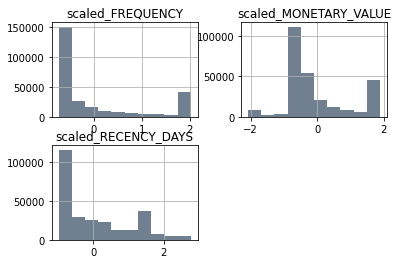

In [26]:
rfm_tab_final[["scaled_FREQUENCY", "scaled_MONETARY_VALUE", "scaled_RECENCY_DAYS"]].hist(color='slategray')

ELBOW METHOD 

In [27]:
from sklearn.cluster import KMeans
from sklearn import datasets
import scipy.stats as stats
from scipy.stats import zscore

In [28]:
rfm_tab_final.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272986 entries, 0 to 272985
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_CLIENT              272986 non-null  int64  
 1   FREQUENCY              272986 non-null  float64
 2   MONETARY_VALUE         272986 non-null  float64
 3   RECENCY_DAYS           272986 non-null  float64
 4   scaled_FREQUENCY       272986 non-null  float64
 5   scaled_MONETARY_VALUE  272986 non-null  float64
 6   scaled_RECENCY_DAYS    272986 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 14.6 MB


c:\users\zuzan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


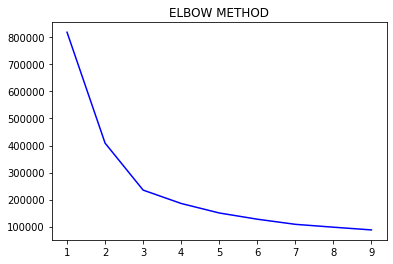

In [29]:
X = rfm_tab_final.iloc[:, [4,5,6]].values

elbow=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)


sns.lineplot(range(1, 10), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

K.MEANS - JEDNOTLIVÉ CLUSTERY

In [30]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [31]:
recency = rfm_tab_final[["scaled_RECENCY_DAYS"]]
kmeans = KMeans(n_clusters=3)
recency_segment=kmeans.fit(recency).labels_ 
recency_segment=pd.DataFrame(recency_segment, columns=['Recency_Cluster'])
rfm_tab_final['Recency_Cluster']=recency_segment
rfm_tab_final = order_cluster('Recency_Cluster',"RECENCY_DAYS", rfm_tab_final, False)
rfm_tab_final.groupby('Recency_Cluster')['RECENCY_DAYS'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_Cluster,,,,,,,,
0,69978.0,1069.491183,124.093859,882.0,1015.0,1023.0,1112.0,1426.0
1,71568.0,695.018165,88.043722,562.0,618.0,689.0,765.0,881.0
2,131440.0,429.751240,45.155587,394.0,396.0,406.0,451.0,561.0


In [32]:
frequency = rfm_tab_final[["scaled_FREQUENCY"]]
kmeans = KMeans(n_clusters=3)
frequency_segment=kmeans.fit(frequency).labels_ 
frequency_segment=pd.DataFrame(frequency_segment, columns=['Frequency_Cluster'])
rfm_tab_final['Frequency_Cluster']=frequency_segment
rfm_tab_final = order_cluster('Frequency_Cluster',"FREQUENCY", rfm_tab_final, True)
rfm_tab_final.groupby('Frequency_Cluster')['FREQUENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_Cluster,,,,,,,,
0,182138.0,14.492786,17.440271,1.0,1.0,6.0,22.0,68.0
1,40114.0,123.313581,39.551839,69.0,89.0,116.0,154.0,208.0
2,50734.0,293.521120,25.781719,209.0,305.5,305.5,305.5,305.5


In [33]:
monetary_value = rfm_tab_final[["scaled_MONETARY_VALUE"]]
kmeans = KMeans(n_clusters=3)
monetary_value_segment=kmeans.fit(monetary_value).labels_ 
monetary_value_segment=pd.DataFrame(monetary_value_segment, columns=['Monetary_value_Cluster'])
rfm_tab_final['Monetary_value_Cluster']=monetary_value_segment
rfm_tab_final = order_cluster('Monetary_value_Cluster',"MONETARY_VALUE", rfm_tab_final, True)
rfm_tab_final.groupby('Monetary_value_Cluster')['MONETARY_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_value_Cluster,,,,,,,,
0,12157.0,-130878.644094,32691.752439,-152666.75,-152666.75,-152666.75,-107300.00,-55340.00
1,199068.0,20716.417089,31294.598380,-55320.00,1000.00,7000.00,31000.00,126601.00
2,61761.0,232498.921249,41065.743937,126607.00,213847.00,257111.25,257111.25,257111.25


PŘÍDÁNÍ VÁHY PRO JEDNOTLIVÉ CLUSTERY

In [34]:
rfm_tab_final['OverallScore'] = rfm_tab_final['Frequency_Cluster'] +  rfm_tab_final['Monetary_value_Cluster'] + rfm_tab_final['Recency_Cluster']
rfm_tab_final.groupby('OverallScore')['FREQUENCY','MONETARY_VALUE','RECENCY_DAYS'].aggregate(['count', np.median, 'mean'])

c:\users\zuzan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


FREQUENCY                    MONETARY_VALUE             \
                 count median        mean          count     median   
OverallScore                                                          
0                  667   26.0   27.556222            667 -130800.00   
1                62077    1.0    8.204311          62077    1000.00   
2                57538    9.0   21.406132          57538    7000.00   
3                73154   18.0   35.838081          73154   13310.00   
4                27102  126.0  156.820714          27102   88000.00   
5                21091  212.0  215.440472          21091  210777.00   
6                31357  305.5  296.671700          31357  257111.25   

                            RECENCY_DAYS                       
                       mean        count  median         mean  
OverallScore                                                   
0            -118692.253748          667  1096.0  1123.526237  
1               6034.432974        62077  1022.0  1062.993862  
2              13905.239637        57538   697.0   711.374709  
3              26121.933951        73154   436.0   486.464240  
4              82895.658789        27102   422.0   526.750793  
5             184720.865405        21091   425.0   501.680717  
6             246937.800244        31357   397.0   413.200370

In [35]:
rfm_tab_final['RFMClass'] = rfm_tab_final.Recency_Cluster.map(str) \
                            + rfm_tab_final.Frequency_Cluster.map(str) \
                            + rfm_tab_final.Monetary_value_Cluster.map(str)

In [36]:
rfm_tab_final.head()

,ID_CLIENT,FREQUENCY,MONETARY_VALUE,RECENCY_DAYS,scaled_FREQUENCY,scaled_MONETARY_VALUE,scaled_RECENCY_DAYS,Recency_Cluster,Frequency_Cluster,Monetary_value_Cluster,OverallScore,RFMClass
0,72327,2.0,2000.0,551.0,-0.728482,-0.581062,-0.407897,2,0,1,3,201
1,72487,9.0,17000.0,396.0,-0.665010,-0.435504,-0.970948,2,0,1,3,201
2,72619,10.0,16000.0,537.0,-0.655943,-0.445208,-0.458753,2,0,1,3,201
3,72350,15.0,65100.0,444.0,-0.610606,0.031251,-0.796584,2,0,1,3,201
4,72358,8.0,8000.0,508.0,-0.674078,-0.522839,-0.564098,2,0,1,3,201


In [37]:
rfm_tab_final['Segment'] = 'Lost_clients'
rfm_tab_final.loc[rfm_tab_final['OverallScore']>0,'Segment'] = 'With_low_potencial' 
rfm_tab_final.loc[rfm_tab_final['OverallScore']>2,'Segment'] = 'With_high_potencial' 
rfm_tab_final.loc[rfm_tab_final['OverallScore']>5,'Segment'] = 'Best clients' 

In [38]:
rfm_tab_final['Segment'] = 'Výherci'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "000",'Segment'] = 'Nevýnosní klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "010",'Segment'] = 'Nevýnosní klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "100",'Segment'] = 'Nevýnosní klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "020",'Segment'] = 'Nevýnosní klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "110",'Segment'] = 'Nevýnosní klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "120",'Segment'] = 'Nevýnosní klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "210",'Segment'] = 'Nevýnosní klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "200",'Segment'] = 'Noví klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "201",'Segment'] = 'Noví klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "202",'Segment'] = 'Noví klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "001",'Segment'] = 'Ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "002",'Segment'] = 'Ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "011",'Segment'] = 'Ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "012",'Segment'] = 'Ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "021",'Segment'] = 'Ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "022",'Segment'] = 'Ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "101",'Segment'] = 'Téměř ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "102",'Segment'] = 'Téměř ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "111",'Segment'] = 'Téměř ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "112",'Segment'] = 'Téměř ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "121",'Segment'] = 'Téměř ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "122",'Segment'] = 'Téměř ztracení klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "211",'Segment'] = 'Klienti s vysokým potenciálem'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "212",'Segment'] = 'Klienti s vysokým potenciálem'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "221",'Segment'] = 'Nejlepší klienti'
rfm_tab_final.loc[rfm_tab_final['RFMClass'] == "222",'Segment'] = 'Nejlepší klienti'

In [39]:
rfm_tab_final.head(10)

,ID_CLIENT,FREQUENCY,MONETARY_VALUE,RECENCY_DAYS,scaled_FREQUENCY,scaled_MONETARY_VALUE,scaled_RECENCY_DAYS,Recency_Cluster,Frequency_Cluster,Monetary_value_Cluster,OverallScore,RFMClass,Segment
0,72327,2.0,2000.0,551.0,-0.728482,-0.581062,-0.407897,2,0,1,3,201,Noví klienti
1,72487,9.0,17000.0,396.0,-0.665010,-0.435504,-0.970948,2,0,1,3,201,Noví klienti
2,72619,10.0,16000.0,537.0,-0.655943,-0.445208,-0.458753,2,0,1,3,201,Noví klienti
3,72350,15.0,65100.0,444.0,-0.610606,0.031251,-0.796584,2,0,1,3,201,Noví klienti
4,72358,8.0,8000.0,508.0,-0.674078,-0.522839,-0.564098,2,0,1,3,201,Noví klienti
5,72389,5.0,13500.0,496.0,-0.701280,-0.469468,-0.607689,2,0,1,3,201,Noví klienti
6,72497,7.0,19400.0,561.0,-0.683145,-0.412215,-0.371571,2,0,1,3,201,Noví klienti
7,72536,20.0,49000.0,472.0,-0.565268,-0.124981,-0.694871,2,0,1,3,201,Noví klienti
8,72588,7.0,11000.0,490.0,-0.683145,-0.493728,-0.629485,2,0,1,3,201,Noví klienti
9,72603,9.0,22000.0,427.0,-0.665010,-0.386985,-0.858338,2,0,1,3,201,Noví klienti


In [40]:
rfm_tab_final.to_csv("rfm_tab_final_class.csv", sep=',', index = False)

In [41]:
rfm_tab_final.groupby('Segment')['FREQUENCY','MONETARY_VALUE','RECENCY_DAYS','Segment','RFMClass'].aggregate(['count', np.median, 'mean'])

c:\users\zuzan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


FREQUENCY                    MONETARY_VALUE  \
                                  count median        mean          count   
Segment                                                                     
Klienti s vysokým potenciálem     23491  118.0  124.990337          23491   
Nejlepší klienti                  35790  305.5  294.716248          35790   
Nevýnosní klienti                  6180  106.0  123.365858           6180   
Noví klienti                      65742   14.0   20.375133          65742   
Téměř ztracení klienti            69124   14.0   57.528290          69124   
Výherci                            3990  305.5  293.341479           3990   
Ztracení klienti                  68669    2.0   25.409209          68669   

                                                        RECENCY_DAYS          \
                                  median           mean        count  median   
Segment                                                                        
Klienti s vysokým potenciálem  112280.00  125081.252575        23491   403.0   
Nejlepší klienti               257111.25  222663.590563        35790   397.0   
Nevýnosní klienti             -152666.75 -127327.765696         6180   607.0   
Noví klienti                    12000.00   24029.896231        65742   424.0   
Téměř ztracení klienti          14400.00   55333.734455        69124   690.0   
Výherci                       -152666.75 -142371.188283         3990   397.0   
Ztracení klienti                 1000.00   28180.408048        68669  1023.0   

                                            
                                      mean  
Segment                                     
Klienti s vysokým potenciálem   424.729939  
Nejlepší klienti                414.397765  
Nevýnosní klienti               667.703236  
Noví klienti                    441.293526  
Téměř ztracení klienti          695.494589  
Výherci                         412.372180  
Ztracení klienti               1068.912202

In [42]:
rfm_tab_final.groupby('RFMClass')['FREQUENCY','MONETARY_VALUE','RECENCY_DAYS', 'RFMClass'].aggregate(['count', np.median, 'mean']).sort_values rfm_tab_final.groupby('RFMClass')['FREQUENCY','MONETARY_VALUE','RECENCY_DAYS', 'RFMClass'].aggregate(['count', np.median, 'mean'])

SyntaxError: invalid syntax (<ipython-input-42-31a7d2e220eb>, line 1)

In [ ]:
#rfm_tab_final.to_csv("rfm_tab_final_seg.csv", sep=',', index = False)